In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import branca
import folium
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta

In [5]:
# Full database
# df is still the sample csv, need to be changed with the full dataset filtered on stations from Rotterdam to the Hague
df = pd.read_csv('data/prog en realisatie ophalen - sample1.csv') 
# Codes of stations associated to their commercial name
stations_codes = pd.read_excel("data/data_stations_codes.xlsx")
# GeoJson files that contains the geometry of the location of station
gdf_points = gpd.read_file("data/data_stations_geometry.geojson")

#Small database for testing
df= df.head(30)
display (df)

,DAGNR,WEEK_DAG_NR,TRAJECT,DAGDEELTREIN,TREINSERIEBASIS,PLANTIJD_VERTREK,UITVOERTIJD_AANKOMST,UITVOERTIJD_VERTREK,BEWEGINGNUMMER,REALISATIE,PROGNOSE_REIZEN,AFWIJKING
0,1,6,Es_Hgl,Weekend,1600,13:16:00.000,13:23:01.000,13:16:32.000,1648,252.030990,224.81343,-0.108004
1,1,6,Hgl_Aml,Weekend,1600,13:24:00.000,13:33:44.000,13:24:36.000,1648,322.713513,282.82303,-0.123620
2,1,6,Aml_Dv,Weekend,1600,13:36:00.000,13:58:14.000,13:36:14.000,1648,333.953779,310.01503,-0.071688
3,1,6,Dv_Apd,Weekend,1600,14:03:00.000,14:13:39.000,14:04:17.000,1648,469.276217,467.72863,-0.003298
4,1,6,Apd_Amf,Weekend,1600,14:14:00.000,14:37:43.000,14:15:55.000,1648,521.522926,560.18143,0.074130
5,1,6,Amf_Hvs,Weekend,1600,14:41:00.000,14:51:44.000,14:41:09.000,1648,196.158682,290.07423,0.478837
6,1,6,Hvs_Dvd,Weekend,1600,14:55:00.000,15:09:41.000,14:55:18.000,1648,201.273497,369.83743,0.837596
7,1,6,Dvd_Asdz,Weekend,1600,15:10:00.000,15:14:57.000,15:10:32.000,1648,170.925956,270.13343,0.580501
8,1,6,Asdz_Shl,Weekend,1600,15:16:00.000,15:21:59.000,15:16:21.000,1648,110.901066,123.29663,0.111798
9,1,6,Shl_Asdz,Weekend,1600,13:38:00.000,13:46:07.000,13:40:24.000,1649,223.790104,235.69023,0.053182


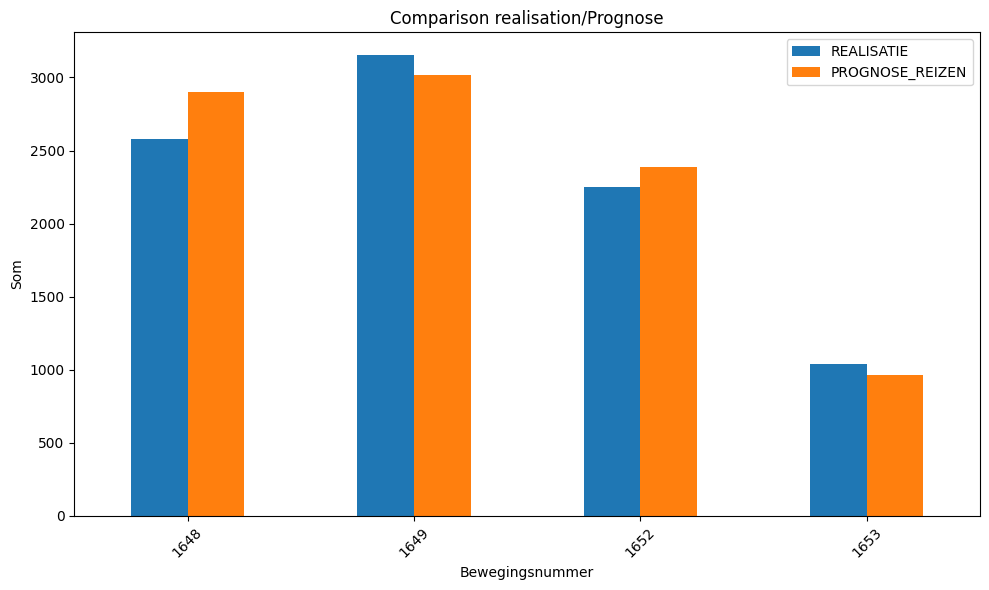

In [21]:
REALISATIE_SUM = df.groupby("BEWEGINGNUMMER")["REALISATIE"].sum()
PROGNOSE_REIZEN_SUM = df.groupby("BEWEGINGNUMMER")["PROGNOSE_REIZEN"].sum()
plot_df = pd.DataFrame({"REALISATIE": REALISATIE_SUM,"PROGNOSE_REIZEN": PROGNOSE_REIZEN_SUM})

plot_df.plot(kind="bar", figsize=(10,6))
plt.title("Comparison realisation/Prognose")
plt.xlabel("Bewegingsnummer")
plt.ylabel("Som")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
